In [11]:
import pickle
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
with open(
    "/home/mel/Desktop/repos/cottagecore_tradfem_pipeline/pickle_files/full_data2.pkl",
    "rb",
) as f:
    df = pickle.load(f)
print(df.head())
print(len(df))

               time_posted              blog_name             post_id  \
0  2020-05-08 01:59:05 GMT        lovemesometrees  617509704722268160   
1  2020-05-08 01:45:43 GMT  yourlocalgothamitegay  617508863963430912   
2  2020-05-08 01:39:46 GMT       feedingsquirrels  617508489074458624   
3  2020-05-08 01:35:47 GMT     roseground-reverie  617508238381957120   
4  2020-05-08 01:32:08 GMT           peachy-trans  617508009475817472   

  post_type                                         image_urls  \
0      text  [https://64.media.tumblr.com/bf78459d7bb388203...   
1      text                                                 []   
2      text                                                 []   
3      text  [https://64.media.tumblr.com/83c808d565866888b...   
4      text                                                 []   

                                        links  \
0                                          []   
1                                          []   
2                

In [6]:
# getting tradwife tags thru co-occurence network

# start with all the posts tagged tradwife
contains = ["tradwife" in tags for tags in df["tags"]]
tradwifedf = df[contains]
print(len(tradwifedf))


# now build a network with tags from those posts
def make_cooccurence(df):
    """
    takes a df of tumblr posts (cleaned by cleandata2.py) and returns a networkx tag co-occurence graph

    pandas df -> networkx graph
    """
    T = nx.Graph()

    for index, row in df.iterrows():  # loop thru posts
        for tag1 in row["tags"]:
            for tag2 in row["tags"]:  # for each combination of tags within a post
                if tag1 != tag2:  # if they are not the same tag
                    if T.has_edge(tag1, tag2):
                        T[tag1][tag2]["weight"] = T[tag1][tag2]["weight"] + 1
                    else:
                        T.add_edge(tag1, tag2, weight=1)
    print("Num nodes: " + str(len(T.nodes())))
    print("Num edges: " + str(len(T.edges())))
    return T


T = make_cooccurence(tradwifedf)

1505
Num nodes: 668
Num edges: 10359


In [9]:
T_trimmed = nx.k_core(T, k=33)  # trimming to 33rd k-core and choosing out of this list
print(len(T_trimmed.nodes()))
print(T_trimmed.nodes())
tradtags = [
    "traditional femininity",
    "traditional gender roles",
    "tradblr",
    "tradcat",
    "tradfem",
    "traditional",
    "tradwife",
    "traditional wife",
]
print("Selected Tags: ", tradtags)
# other tags that are weird - "13th", "26th", "31st", "1st"

86
['mushroomcore', 'homemaking', 'May 20th 2021', 'April 13th 2021', 'homemaker', 'modestclothing', 'traditional', 'cottagecharm', 'softcore', 'cottagecore aesthetic', 'femininity', '13th', 'cottage life', 'farm life', 'cottage core', 'forestcore', 'slow living', 'farm', 'babies', 'fairy', 'home', 'traditional femininity', 'cottage', 'country life', 'cozycore', 'grandmacore', 'April', 'farmcore', '1st', 'modestcottagecore', 'children', '2021', 'cuteanimals', 'traditional gender roles', 'fairycore', 'June', 'soft', 'honeycore', 'forest cottage', 'food', 'feminine aesthetic', 'country cottage', 'outfits', 'homemade', 'cottage aesthetic', 'tradwife', 'feminine style', 'April 14th 2021', 'naturecore', '14th', 'oldfashioned', 'homesteading', 'prariecore', 'grandma', 'cottagecore', '30th', 'fairy core', 'tradfem', '20th', 'feminine', 'farming', 'May', 'family', 'meadow', 'baby', 'tradblr', 'tradcat', 'cozy aesthetic', 'traditional wife', 'homestead', '31st', 'flowers', 'cute', 'nature', 'vi

In [10]:
# getting all relevant tradwife posts
contains = [not set(tags).isdisjoint(tradtags) for tags in df["tags"]]
traddf = df[contains]
print(len(traddf))

2449


/tmp/ipykernel_90798/3160143267.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  timeline["time_posted"] = timeline["time_posted"].astype("datetime64[ns]")
/tmp/ipykernel_90798/3160143267.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tradtimeline["count"] = 1 #add row to count number of posts
/tmp/ipykernel_90798/3160143267.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

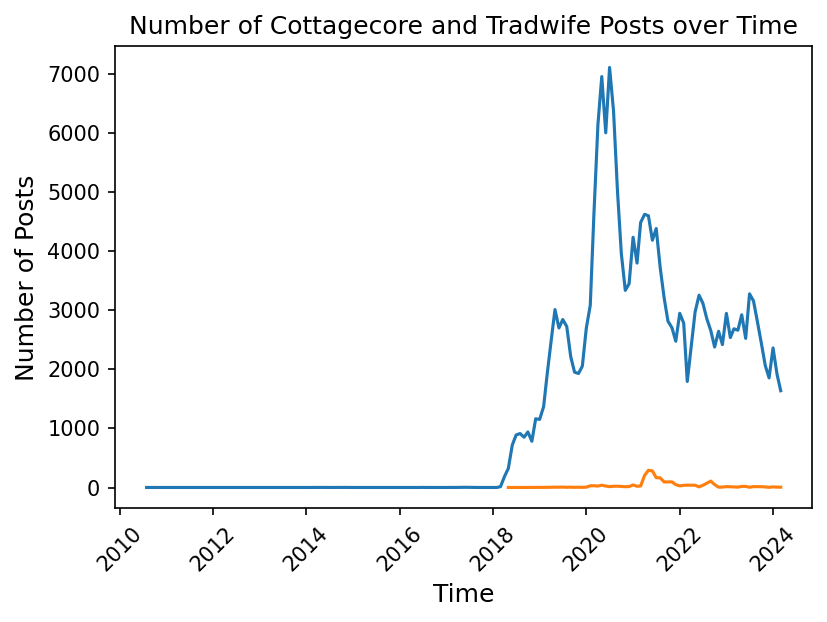

In [39]:
# graphing timeline of cottagecore and tradwife posts
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=150)

timeline = df  # grab data
timeline["count"] = 1  # add row to count number of posts
timeline = timeline[["time_posted", "count"]]  # select relevant cols
timeline["time_posted"] = timeline["time_posted"].astype("datetime64[ns]")

timeline = (
    timeline.groupby(
        [timeline.time_posted.dt.to_period("M").astype("datetime64[ns]")]
    )  # group by month for plotting
    .sum("count")
    .reset_index()
)
# pd.plotting.register_matplotlib_converters()

tradtimeline = traddf  # repeat for tradwife posts
tradtimeline["count"] = 1  # add row to count number of posts
tradtimeline = tradtimeline[["time_posted", "count"]]  # select relevant cols
tradtimeline["time_posted"] = tradtimeline["time_posted"].astype("datetime64[ns]")

tradtimeline = (
    tradtimeline.groupby(
        [tradtimeline.time_posted.dt.to_period("M").astype("datetime64[ns]")]
    )  # group by month for plotting
    .sum("count")
    .reset_index()
)

ax.plot(timeline["time_posted"], timeline["count"])  # plot both on the same axis
ax.plot(tradtimeline["time_posted"], tradtimeline["count"])


ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Number of Posts", fontsize=12)
plt.xticks(rotation=45)
ax.set_title("Number of Cottagecore and Tradwife Posts over Time")

plt.show()

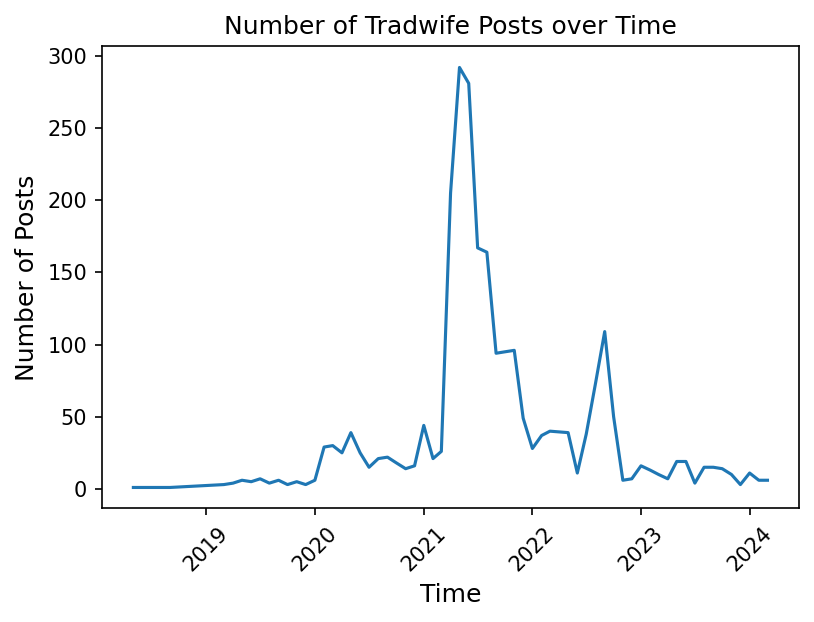

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=150)

ax.plot(tradtimeline["time_posted"], tradtimeline["count"])


ax.set_xlabel("Time", fontsize=12)
ax.set_ylabel("Number of Posts", fontsize=12)
plt.xticks(rotation=45)
ax.set_title("Number of Tradwife Posts over Time")

plt.show()

In [43]:
# creating spreadsheet fpickle_files/full_data2.pklor content analysis
traddf[["post_url"]].to_csv(
    "/home/mel/Desktop/repos/cottagecore_tradfem_pipeline/Cottagecore_Tradwife_Pipeline/data/tradposts.csv"
)